In [1]:
##imports from libraries
import pandas as pd
import numpy as np
import time
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import resource
import psutil

In [2]:
## Preprocessing of data
# Load data here:

data1 = pd.read_csv('CA1_1c_greenhouse_cleanedData_part1.csv')
data2 = pd.read_csv('CA1_1c_greenhouse_cleanedData_part2.csv')
data = pd.concat([data1,data2],ignore_index=True)


##df = pd.read_csv("data.csv")
##X= pd.read_csv('X.txt')
##Y= pd.read_csv('Y.txt')

In [3]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,5222,5223,5224,5225,5226,5227,5228,5229,5230,5231
count,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,...,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000,2921.000000
mean,0.030191,0.218844,0.410405,0.071447,0.022690,0.004726,3.152468,1.700215,0.674371,0.339471,...,26.379912,9.873501,2.899675,1.011844,3.759886,36.939034,0.626003,7.174689,3.161358,73.350429
std,0.132199,0.496537,2.745421,0.336080,0.137990,0.030459,8.597133,3.792870,1.360325,1.231664,...,43.139129,27.018275,6.864598,3.076925,12.130998,133.998219,3.201484,41.712019,3.989670,103.333394
min,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,0.000100,...,0.000173,0.000126,0.000100,0.000100,0.000127,0.000149,0.000100,0.000112,0.110204,0.006269
25%,0.000119,0.000131,0.000121,0.000120,0.000120,0.000118,0.000763,0.000125,0.000120,0.000118,...,2.897743,0.527519,0.285838,0.001284,0.248619,0.236190,0.000963,0.025094,0.806360,21.396120
50%,0.000120,0.000404,0.000140,0.000125,0.000121,0.000120,0.072994,0.017652,0.011291,0.000120,...,14.014420,1.633425,0.668946,0.002203,0.633415,0.441041,0.001466,0.039765,1.684643,44.736370
75%,0.000122,0.216462,0.000840,0.000948,0.000142,0.000121,0.889772,0.935965,0.475742,0.000492,...,28.440720,8.264952,2.889160,0.105745,1.929311,5.709433,0.022895,0.458907,4.002186,86.363930
max,1.969151,5.082874,65.326660,6.888038,2.014192,0.579317,75.731310,32.348850,13.218590,13.902400,...,724.728100,415.145100,84.716780,28.787640,165.518700,1675.449000,48.976020,708.306000,30.016900,1178.660000


In [4]:
## Find the number of 'nan' in each column:
data.isnull().sum()

0       0
1       0
2       0
3       0
4       0
       ..
5227    0
5228    0
5229    0
5230    0
5231    0
Length: 5232, dtype: int64

In [5]:
data.shape

(2921, 5232)

In [6]:
## Defien X and Y
X=data.iloc[:,0:5231]
Y=data.iloc[:,5231]

x_mean=X.mean()
x_std= X.std()
X=(X-x_mean)/x_std

# Split train and test data here: (X_train, Y_train, X_test, Y_test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [8]:
X_train.shape

(2336, 5231)

In [9]:
Y_train.shape

(2336,)

In [14]:
## Logistic ridge regression with different optimizers
# cost function and gradient calculation

def cost(x, y, w, lambda_):
    N,D = x.shape
    value = 0
    for i in range(N):
        Z = -1 * y[i] * np.matmul(w.T , x[i,:].reshape(D,1))
        value += np.log(1+np.exp(Z))
    norm_w = np.linalg.norm(w)
    return value/N + lambda_*norm_w**2

def grad(X, Y, w, lambda_):
    # Calculate the gradient here
    N, D = X.shape
    gradient = np.zeros((D, 1))
    Y = np.array(Y).reshape(-1, 1) # convert Y to numpy array and reshape
    for i in range(N):
        Z = Y[i] * np.matmul(w.T, (X[i, :]).reshape(D, 1)) # use X[i, :] instead of X[:, i]
        exp_Z = np.exp(-Z)
        gradient += (-Y[i] / (1 + exp_Z)) * (X[i, :]).reshape(D, 1)
    gradient += 2 * lambda_ * w # add regularization term
    
    return gradient

In [73]:
## Define solvers: GD, SGD, SVRG and SAG. 
# Setting the values here:

#alpha = 0.01
#num_iters = 1000
#lambda_ = 0.01
#epsilon = 1e-6

alpha = 1 # change the value
num_iters = 30 #[1:5:30] # change the value
lambda_ = 0.1 #change the value
epsilon = 0.001 #change the value


In [74]:
 # ---------------------- Complete the blank definitions: --------------------------------------

def solver(x,y, w, alpha, num_iters , lambda_ , epsilon , optimizer, mem):
    N,D = x.shape
    if (optimizer == "GD") :
        for i in range(num_iters):
            # update the parameter w for GD here:
            grad_w = grad(x, y, w, lambda_)
            w = w - alpha * grad_w
            if (i%10==0) and (mem):
                usage=resource.getrusage(resource.RUSAGE_SELF)
                print("mem for GD (MB):", (usage[2]*resource.getpagesize())/1000000.0)
            
            if (np.linalg.norm(grad_w) <= epsilon):
                break
            
    elif (optimizer == "SGD"):
        for i in range(num_iters):
            # Complete SGD here:
            idx = np.random.choice(N,1)[0]
            grad_w = grad(x[idx, :].reshape(1, D), y[idx], w, lambda_)
            w = w - alpha * grad_w
            if (i%10==0) and (mem):
                usage=resource.getrusage(resource.RUSAGE_SELF)
                print("mem for SGD (MB):", (usage[2]*resource.getpagesize())/1000000.0)
            
            if (np.linalg.norm(grad_w) <= epsilon):
                break
        
        
            
    elif (optimizer == "SVRG"):
        T = 100
        K = math.floor(num_iters/T)
        Z = np.matmul(x,np.diagflat(y))
        N = x.shape[1]
        w_tilde = w
        for k in range(K):
            wz = np.matmul(w_tilde.T , Z)
            diag = np.diagflat(1/(1+np.exp(-1*wz))-np.ones((1,N)))
            Ga_ = np.matmul(Z , diag)
            ga_ = (1/N) * np.matmul(Ga_ , np.ones((N,1)))
            for t in range(T):
            # Complete SVRG here:
                idx = np.random.randint(N)
                x_t = x[idx,:].reshape(1,-1)
                y_t = y[idx]
                grad_w_tilde = grad(x_t, y_t, w_tilde, lambda_)
                grad_w = grad(x_t, y_t, w, lambda_)
                w_tilde = w_tilde - alpha * (grad_w_tilde - grad_w + Ga_[idx,:] - ga_)
            w = w_tilde
            if (i%10==0) and (mem):
                usage=resource.getrusage(resource.RUSAGE_SELF)
                print("mem for SVRG (MB):", (usage[2]*resource.getpagesize())/1000000.0)
            
            if (np.linalg.norm(grad_w) <= epsilon):
                break

            
    elif (optimizer == "SAG"):
        # initialize gradient and memory for each data point
        grad_memory = np.zeros((N, D))
        grad_avg = grad(x, y, w, lambda_)
        for i in range(num_iters):
            idx = np.random.choice(2336, 1)[0]
            grad_memory[idx, :] = grad(x[idx, :], y[idx], w, lambda_)
            grad_avg = (1/N) * (grad_avg - grad_memory[idx, :] + grad(x[idx, :].reshape(1, D), y[idx], w, lambda_))
            w = w - alpha * grad_avg
            if (i%10==0) and (mem):
                usage=resource.getrusage(resource.RUSAGE_SELF)
                print("mem for SAG (MB):", (usage[2]*resource.getpagesize())/1000000.0)
            
            if (np.linalg.norm(grad_w) <= epsilon):
                break
    return w


In [93]:
 x.T.shape

(5231, 2336)

In [76]:
## Solving the optimization problem:

y = np.array(Y_train.iloc[0:2336])
x = np.array(X_train.iloc[0:2336,:])
N,D = x.shape
w = np.random.rand(D,1)*0.01  # Initialization of w

#-------------------- GD Solver -----------------------
num_iters = 100 # change the value (number of iteration)
start = time.time() # take time
gde = solver(x.T, y, w,alpha, num_iters, lambda_,epsilon, "GD", False) # complete the command 
end = time.time()
print("Weights of GD after convergence: \n",gde)

cost_value = cost(x, y, gde, lambda_)  # Calculate the cost value
print("Cost of GD after convergence: ",cost_value)

print("Training time for GD: ", end-start)

/var/folders/l9/nl6ry63s0m3_35qt7mrjv0fh0000gn/T/ipykernel_10411/4238793391.py:19: RuntimeWarning: overflow encountered in exp
  exp_Z = np.exp(-Z)


Weights of GD after convergence: 
 [[-0.04897614]
 [-0.09484781]
 [-0.03217921]
 ...
 [-0.04157565]
 [-0.03584057]
 [-0.12151527]]
Cost of GD after convergence:  [[inf]]
Training time for GD:  4.355834722518921


/var/folders/l9/nl6ry63s0m3_35qt7mrjv0fh0000gn/T/ipykernel_10411/4238793391.py:9: RuntimeWarning: overflow encountered in exp
  value += np.log(1+np.exp(Z))


...... 0 .......
...... 1 .......
...... 2 .......
...... 3 .......
...... 4 .......
...... 5 .......
...... 6 .......
...... 7 .......
...... 8 .......


/var/folders/l9/nl6ry63s0m3_35qt7mrjv0fh0000gn/T/ipykernel_10411/4238793391.py:9: RuntimeWarning: overflow encountered in exp
  value += np.log(1+np.exp(Z))


...... 9 .......


/var/folders/l9/nl6ry63s0m3_35qt7mrjv0fh0000gn/T/ipykernel_10411/4238793391.py:19: RuntimeWarning: overflow encountered in exp
  exp_Z = np.exp(-Z)


...... 10 .......
...... 11 .......
...... 12 .......
...... 13 .......
...... 14 .......
...... 15 .......
...... 16 .......
...... 17 .......
...... 18 .......
...... 19 .......
...... 20 .......
...... 21 .......
...... 22 .......
...... 23 .......
...... 24 .......
...... 25 .......
...... 26 .......
...... 27 .......
...... 28 .......
...... 29 .......
...... 30 .......
...... 31 .......
...... 32 .......
...... 33 .......
...... 34 .......
...... 35 .......
...... 36 .......
...... 37 .......
...... 38 .......
...... 39 .......
...... 40 .......
...... 41 .......
...... 42 .......
...... 43 .......
...... 44 .......
...... 45 .......
...... 46 .......
...... 47 .......
...... 48 .......
...... 49 .......


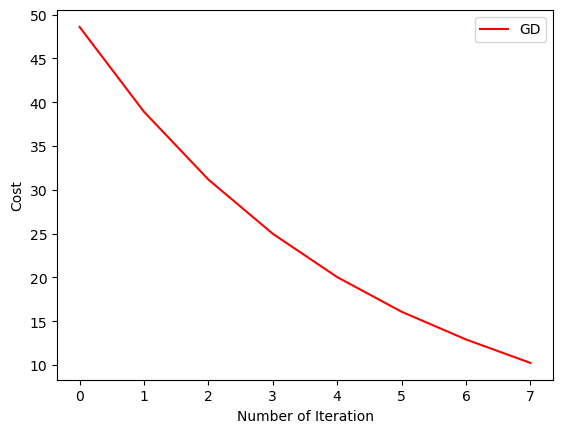

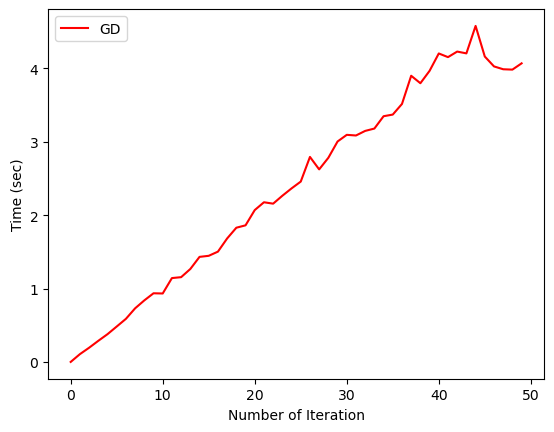

In [77]:
## Executing the iterations and plot the cost function here:
ti= np.zeros((50,4))
cost_= np.zeros((50,4))
for i in range(50):
    print("......",i,".......")
    #--------------GD-------------------
    start = time.time()
    #gde = solver(x.T,y,w,num_iters=i)
    gde = solver(x.T, y, w, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer="GD", mem=False) 
    end = time.time()
    cost_[i,0] = cost(x,y,gde,lambda_)
    ti[i,0] = end-start

    
## Pl the results:

l0 = plt.plot(cost_[:,0],color="red")
# complete other plots here: 

plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.legend(['GD'])
plt.show()



l0 = plt.plot(ti[:,0],color="red")
# complete other plots here:


plt.xlabel("Number of Iteration")
plt.ylabel("Time (sec)")
plt.legend(['GD'])
plt.show()
    
 

In [79]:
#-------------------- SGD Solver -----------------------
# complete here :

# number of iterartions:
num_iters = 30

# number of batches
batch_size = 5


start = time.time() # take time
sgde = solver(x, y, w,alpha, num_iters, lambda_,epsilon, "SGD", False)
end = time.time()
print("Weights of SGD after convergence: \n", sgde)

#Cost value
cost_value = cost(x, y, sgde, lambda_)
print("Cost of SGD after convergence: ", cost_value)

print("Training time for SGD: ", end-start)

IndexError: invalid index to scalar variable.

In [80]:
#-------------------- SVRG Solver -----------------------
# complete here :

# number of iterartions:
num_iters = 30

# number of batches
batch_size = 5

start = time.time() # take time
svrge = solver(x.T, y, w,alpha, num_iters, lambda_,epsilon, "SVRG", False)
end = time.time()
print("Weights of SVRG after convergence: \n", svrge)

#Cost value
cost_value = cost(x, y, svrge, lambda_)
print("Cost of SVRG after convergence: ", cost_value)

print("Training time for SVRG: ", end-start)

Weights of SVRG after convergence: 
 [[0.00807477]
 [0.00934614]
 [0.00535729]
 ...
 [0.00014211]
 [0.00477592]
 [0.00296958]]
Cost of SVRG after convergence:  [[48.60154288]]
Training time for SVRG:  0.703589916229248


...... 0 .......
...... 1 .......
...... 2 .......
...... 3 .......
...... 4 .......
...... 5 .......
...... 6 .......
...... 7 .......
...... 8 .......
...... 9 .......
...... 10 .......
...... 11 .......
...... 12 .......
...... 13 .......
...... 14 .......
...... 15 .......
...... 16 .......
...... 17 .......
...... 18 .......
...... 19 .......
...... 20 .......
...... 21 .......
...... 22 .......
...... 23 .......
...... 24 .......
...... 25 .......
...... 26 .......
...... 27 .......
...... 28 .......
...... 29 .......
...... 30 .......
...... 31 .......
...... 32 .......
...... 33 .......
...... 34 .......
...... 35 .......
...... 36 .......
...... 37 .......
...... 38 .......
...... 39 .......
...... 40 .......
...... 41 .......
...... 42 .......
...... 43 .......
...... 44 .......
...... 45 .......
...... 46 .......
...... 47 .......
...... 48 .......
...... 49 .......


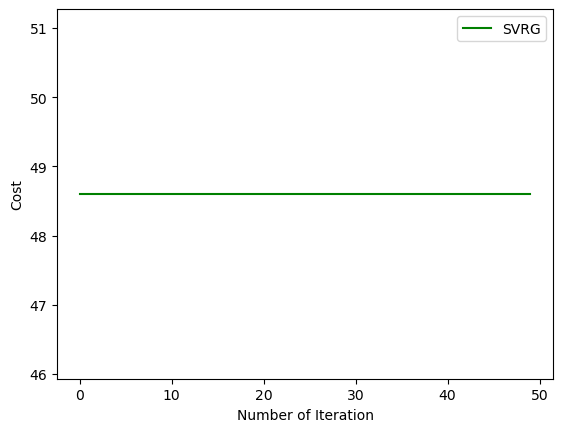

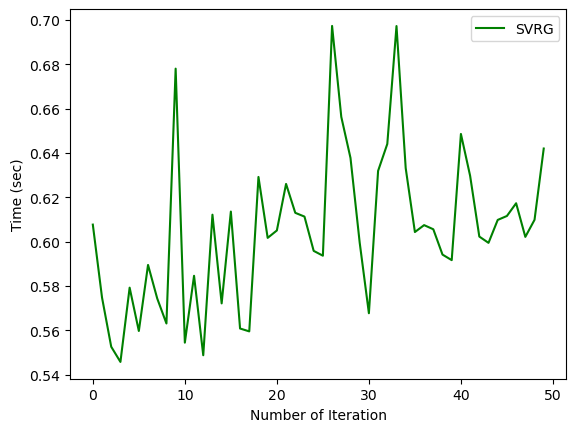

In [82]:
## Executing the iterations and plot the cost function here:
ti= np.zeros((50,4))
cost_= np.zeros((50,4))
for i in range(50):
    print("......",i,".......")
    

    #---------------SVRG----------------
    #Complete for SVRG solver here :
    start = time.time()
    #svrge = solver(x.T,y,w,num_iters=i)
    svrge = solver(x.T,y, w, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer = "SVRG",mem=False)
    end = time.time()

    cost_[i,2] = cost(x,y,svrge,lambda_)

    ti[i,2] = end-start
    

    
## Pl the results:


# complete other plots here: 

l2 = plt.plot(cost_[:,2],color="green")


plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.legend(['SVRG'])
plt.show()




# complete other plots here:

l2 = plt.plot(ti[:,2],color="green")


plt.xlabel("Number of Iteration")
plt.ylabel("Time (sec)")
plt.legend(['SVRG'])
plt.show()
    

In [81]:

#-------------------- SAG Solver -----------------------
# complete here :

# number of iterartions:
num_iters = 30

start = time.time() # take time
sage = solver(x.T, y, w,alpha, num_iters, lambda_,epsilon, "SAG",False)
end = time.time()
print("Weights of SAG after convergence: \n", sage)

# Cost value
cost_value = cost(x, y, sage, lambda_)
print("Cost of SAG after convergence: ", cost_value)

print("Training time for SAG: ", end-start)

ValueError: not enough values to unpack (expected 2, got 1)

In [63]:
## Executing the iterations and plot the cost function here:
ti= np.zeros((50,4))
cost_= np.zeros((50,4))
for i in range(50):
    print("......",i,".......")
    #--------------GD-------------------
    start = time.time()
    #gde = solver(x.T,y,w,num_iters=i)
    gde = solver(x.T, y, w, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer="GD", mem=False) 
    end = time.time()

    cost_[i,0] = cost(x,y,gde,lambda_)

    ti[i,0] = end-start

    #---------------SGD------------------
    #Complete for SGD solver here :
    start = time.time()
    #sgde = solver(x,y,w,num_iters=i)
    sgde = solver(x.T, y, w, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer="SGD", mem=False)
    end = time.time()

    cost_[i,1] = cost(x,y,sgde,lambda_)

    ti[i,1] = end-start
    
    #---------------SVRG----------------
    #Complete for SVRG solver here :
    start = time.time()
    #svrge = solver(x.T,y,w,num_iters=i)
    svrge = solver(x.T,y, w, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer = "SVRG",mem=False)
    end = time.time()

    cost_[i,2] = cost(x,y,svrge,lambda_)

    ti[i,2] = end-start
    
    #---------------SAG------------------
    #Complete for SAG solver here :
    start = time.time()
    #sage=solver(x.T,y,w,num_iters=i)
    sage = solver(x.T,y, w, alpha, num_iters=i, lambda_=lambda_, epsilon=epsilon, optimizer = "SAG",mem=False)
    
    end = time.time()

    cost_[i,3] = cost(x,y,sage,lambda_)

    ti[i,3] = end-start
    
## Pl the results:

l0 = plt.plot(cost_[:,0],color="red")
# complete other plots here: 
l1 = plt.plot(cost_[:,1],color="blue")
l2 = plt.plot(cost_[:,2],color="green")
l3 = plt.plot(cost_[:,3],color="black")

plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.legend(['GD', 'SGD', 'SVRG', 'SAG'])
plt.show()



l0 = plt.plot(ti[:,0],color="red")
# complete other plots here:
l1 = plt.plot(ti[:,1],color="blue")
l2 = plt.plot(ti[:,2],color="green")
l3 = plt.plot(ti[:,3],color="black")

plt.xlabel("Number of Iteration")
plt.ylabel("Time (sec)")
plt.legend(['GD', 'SGD', 'SVRG', 'SAG'])
plt.show()
    
 

...... 0 .......
...... 1 .......


/var/folders/l9/nl6ry63s0m3_35qt7mrjv0fh0000gn/T/ipykernel_10411/4238793391.py:9: RuntimeWarning: overflow encountered in exp
  value += np.log(1+np.exp(Z))


IndexError: index 4953 is out of bounds for axis 0 with size 2336

In [59]:
## PART 2: Tunning the hyper-paramter here:

# Define lambda and alpha ranges
lambda_set = [0.001, 0.01, 0.1, 1, 10, 100]
alpha_set= [0.001, 0.01, 0.1]  


min_cost_gd = float('inf')
lambda_opt_gd = None
alpha_opt_gd = None

min_cost_sgd = float('inf')
lambda_opt_sgd = None
alpha_opt_sgd = None

min_cost_svrg = float('inf')
lambda_opt_svrg = None
alpha_opt_svrg = None

min_cost_sag = float('inf')
lambda_opt_sag = None
alpha_opt_sag = None

for lambda_ in lambda_set:
    for alpha in alpha_set:
        gde = solver(x, y, w,alpha, num_iters, lambda_,epsilon, 'gd',mem=False) # complete the command 
        cost_gd = cost(x, y, gde, lambda_=lambda_)
        if cost_gd < min_cost_gd:
            min_cost_gd = cost_gd
            lambda_opt_gd = lambda_
            alpha_opt_gd = alpha
        
        sgde = solver(x, y, w,alpha, num_iters, lambda_,epsilon, 'sgd',mem=False) # complete the command 
        cost_sgd = cost(x, y, sgde, lambda_=lambda_)
        if cost_sgd < min_cost_sgd:
            min_cost_sgd = cost_sgd
            lambda_opt_sgd = lambda_
            alpha_opt_sgd = alpha
        
        svrge = solver(x, y, w,alpha, num_iters, lambda_,epsilon, 'svrg',mem=False) # complete the command 
        cost_svrg = cost(x, y, svrge, lambda_=lambda_)
        if cost_svrg < min_cost_svrg:
            min_cost_svrg = cost_svrg
            lambda_opt_svrge = lambda_
            alpha_opt_svrge = alpha
            
        sage = solver(x, y, w,alpha, num_iters, lambda_,epsilon, 'sag',mem=False) # complete the command 
        cost_sag = cost(x, y, sage, lambda_=lambda_)
        if cost_sag < min_cost_sag:
            min_cost_sag = cost_sag
            lambda_opt_sage = lambda_
            alpha_opt_sage = alpha
        
        
print("The optimal lambda for GD:", lambda_opt_gd)
print("Optimal alpha for GD:", alpha_opt_gd)

print("The optimal lambda for SGD:", lambda_opt_sgd)
print("Optimal alpha for SGD:", alpha_opt_sgd)

print("The optimal lambda for SVRG:", lambda_opt_svrg)
print("Optimal alpha for SVRG:", alpha_opt_svrg)

print("The optimal lambda for SAG:", lambda_opt_sag)
print("Optimal alpha for SAG:", alpha_opt_sag)



The optimal lambda for GD: 0.001
Optimal alpha for GD: 0.001
The optimal lambda for SGD: 0.001
Optimal alpha for SGD: 0.001
The optimal lambda for SVRG: None
Optimal alpha for SVRG: None
The optimal lambda for SAG: None
Optimal alpha for SAG: None


In [ ]:
## Comparing different optimizers here: 

# initialize hyperparameters
alpha = 0.001
lambda_ = 0.001
epsilon = 0.000001

# initialize results arrays
ti = np.zeros((50,4))
cost_ = np.zeros((50,4))
mem = np.zeros((50,4))

for i in range(50):
    print("......",i,".......")
    
    #--------------GD-------------------
    start = time.time()
    gde = solver(x,y,w,alpha,num_iters=i,lambda_=lambda_,epsilon=epsilon,optimizer="gd", mem=True)
    end = time.time()
    cost_[i,0] = cost(x,y,gde,lambda_)
    ti[i,0] = end-start
    process = psutil.Process()
    mem[i,0] = process.memory_info().rss / 1024 / 1024 # memory usage in MB
    
    #---------------SGD------------------
    start = time.time()
    sgde = solver(x,y,w,alpha,num_iters=i,lambda_=lambda_,epsilon=epsilon,optimizer="sgd", mem=True)
    end = time.time()
    cost_[i,1] = cost(x,y,sgde,lambda_)
    ti[i,1] = end-start
    process = psutil.Process()
    mem[i,1] = process.memory_info().rss / 1024 / 1024
    
    #---------------SVRG----------------
    start = time.time()
    svrge = solver(x,y,w,alpha,num_iters=i,lambda_=lambda_,epsilon=epsilon,optimizer="svrg", mem=True)
    end = time.time()
    cost_[i,2] = cost(x,y,svrge,lambda_)
    ti[i,2] = end-start
    process = psutil.Process()
    mem[i,2] = process.memory_info().rss / 1024 / 1024
    
    #---------------SAG------------------
    start = time.time()
    sage = solver(x,y,w,alpha,num_iters=i,lambda_=lambda_,epsilon=epsilon,optimizer="sag", mem=True)
    end = time.time()
    cost_[i,3] = cost(x,y,sage,lambda_)
    ti[i,3] = end-start
    process = psutil.Process()
    mem[i,3] = process.memory_info().rss / 1024 / 1024
    
    
## Pl the results:
l0 = plt.plot(cost_[:,0],color="red")
# complete other plots here: 
l1 = plt.plot(cost_[:,1],color="blue")
l2 = plt.plot(cost_[:,2],color="green")
l3 = plt.plot(cost_[:,3],color="black")

plt.xlabel("Number of Iteration")
plt.ylabel("Cost")
plt.legend(['GD', 'SGD', 'SVRG', 'SAG'])
plt.show()



l0 = plt.plot(ti[:,0],color="red")
# complete other plots here:
l1 = plt.plot(ti[:,1],color="blue")
l2 = plt.plot(ti[:,2],color="green")
l3 = plt.plot(ti[:,3],color="black")

plt.xlabel("Number of Iteration")
plt.ylabel("Time (sec)")
plt.legend(['GD', 'SGD', 'SVRG', 'SAG'])
plt.show()

l0 = plt.plot(mem[:,0],color="red")
# complete other plots here:
l1 = plt.plot(mem[:,1],color="blue")
l2 = plt.plot(mem[:,2],color="green")
l3 = plt.plot(mem[:,3],color="black")

plt.xlabel("Number of Iteration")
plt.ylabel("Memory (MB)")
plt.legend(['GD', 'SGD', 'SVRG', 'SAG'])
plt.show()